In [9]:
from rotation import Rotation
import numpy as np

x = np.asarray([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
x


array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [15]:
rotated_x = Rotation(alpha= 3/4 * np.pi, beta=0, gamma=0)
rotated_x

matrix([[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.70710678, -0.70710678],
        [ 0.        ,  0.70710678, -0.70710678]])

In [34]:
from scipy.spatial.transform import Rotation as R 
rot = R.random(num=1, random_state=42)
rotated_x = rot.apply(x)
rotated_x

array([[0.70807124, 0.61083703, 0.35427846],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [41]:
#np.sqrt(rotated_x[0, ...][0]**2 + rotated_x[0, ...][1]**2 + rotated_x[0, ...][2]**2)

y = np.random.rand(3, 3)
print(y)

rotated_y = rot.apply(y)
print(rotated_y)
print(np.sqrt(rotated_y[0, ...][0]**2 + rotated_y[0, ...][1]**2 + rotated_y[0, ...][2]**2)) 
print(np.sqrt(y[0, ...][0]**2 + y[0, ...][1]**2 + y[0, ...][2]**2))

[[0.5018605  0.900802   0.03193335]
 [0.65462006 0.97916993 0.49654307]
 [0.69064408 0.23544798 0.21582991]]
[[-0.27487882  0.78994424  0.60395171]
 [-0.18738232  0.66524717  1.07526289]
 [ 0.33964488  0.43138132  0.52683874]]
1.0316627075584326
1.0316627075584326


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import rand, normal
import scipy
from scipy.spatial.transform import rotation as R 


In [2]:
def _plot_2d_histogram(vs, plot_ix):
    # Histogram of angles, also projected in 2d
    ax = plt.subplot(1, 3, plot_ix, projection='polar')
    ax.set_title('Histogram of angles about z axis')
    
    angles = [np.arctan2(y, x) for (x,y,z) in vs]
    ax.hist(angles, bins=100)

In [46]:
def _plot_3d_points(vs, plot_ix):
    # Plot the points on a sphere.
    ax = plt.subplot(1, 3, plot_ix, projection='3d')
    ax.set_title('Points 3D plot')

    # Plot a sphere
    # phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
    # x = np.sin(phi) * np.cos(theta)
    # y = np.sin(phi) * np.sin(theta)
    # z = np.cos(phi)
    # ax.plot_surface(
    #     x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    # Plot data
    data = vs
    xx, yy, zz = np.hsplit(data, 3) 
    ax.scatter(xx, yy, zz, color="k", s=20)

    # Matplotlib actually sucks - removed set_axis equal for 3d plots... so have to make
    # spheres look roughly spherical by this bs now ;-;
    r = 1.3
    ax.set_xlim([-r,r])
    ax.set_ylim([-r,r])
    ax.set_zlim([-1,1])

/var/folders/8f/5w_pg3910f187sm8xvv_9mzm0000gn/T/ipykernel_1651/4008534617.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(1, 3, plot_ix, projection='3d')


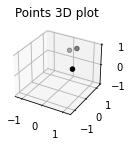

In [47]:
np.random.seed(42)
_plot_3d_points(np.random.rand(3, 3), plot_ix=np.asarray(1))

In [26]:
np.random.rand(3, 3)

array([[0.54729646, 0.60846076, 0.15357934],
       [0.96402119, 0.3079773 , 0.0847274 ],
       [0.70988053, 0.96495432, 0.59315889]])

##############################################################
##############################################################
##############################################################
##############################################################
##############################################################
##############################################################
##############################################################
##############################################################


In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R

In [8]:
coord = np.array(([0, 0, 1], [0, 0, 2], [0, 0, 0]))
rot = R.from_euler("xyz", (0, 90, 0), degrees=True)
rotated_coord = rot.apply(coord)
print(f"Original coordinates: \n{coord}")
print(f"Rotated coordinates: \n{rotated_coord}")

Original coordinates: 
[[0 0 1]
 [0 0 2]
 [0 0 0]]
Rotated coordinates: 
[[1.00000000e+00 0.00000000e+00 2.22044605e-16]
 [2.00000000e+00 0.00000000e+00 4.44089210e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
def get_data(file_name):

    fin = open(file_name)
    first = fin.readline().split()
    no_atoms = int(first[0])
    frame = np.zeros((no_atoms, 4))
    info = fin.readline().split()
    internal_energy_0K = float(info[12])
    id_number = int(info[1])
    temp_dict = []
    ind_energy = 0.

    for i in range(no_atoms):
        temp_dict = []
        temp_dict = fin.readline().split()
        # Here we check the atomic species and assign the atomic number.
        if temp_dict[0] == 'H':
            frame[i, 0] = 1
            ind_energy += -0.5
        elif temp_dict[0] == 'C':
            frame[i, 0] = 6
            ind_energy += -37.8450
        elif temp_dict[0] == 'N':
            frame[i, 0] = 7
            ind_energy += -54.5892
        elif temp_dict[0] == 'O':
            frame[i, 0] = 8
            ind_energy += -75.0673
        elif temp_dict[0] == 'F':
            frame[i, 0] = 9
            ind_energy += -99.7339

        frame[i, 1] = np.single(temp_dict[1])      # Insert x coordinate
        frame[i, 2] = np.single(temp_dict[2])      # Insert y coordinate
        frame[i, 3] = np.single(temp_dict[3])      # Insert z coordinate
        diff_energy = internal_energy_0K - ind_energy

    return no_atoms, internal_energy_0K, frame, id_number, ind_energy, diff_energy

Original coordinates: 
[[-1.26981363e-02  1.08580410e+00  8.00099596e-03]
 [ 2.15041591e-03 -6.03131764e-03  1.97612029e-03]
 [ 1.01173079e+00  1.46375120e+00  2.76574807e-04]
 [-5.40815055e-01  1.44752657e+00 -8.76643717e-01]
 [-5.23813605e-01  1.43793261e+00  9.06397283e-01]]


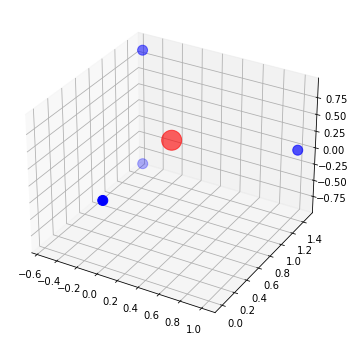

In [27]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
molecule = get_data("/Users/lucabrodoloni/Desktop/Stage/Dataset/dsgdb9nsd_000001.xyz")
mol_coord = molecule[2][..., 1:]
print(f"Original coordinates: \n{mol_coord}")
# molecule plot
ax.scatter(mol_coord[:, 0], mol_coord[:, 1], mol_coord[:, 2], s = [400, 100, 100, 100, 100], c=["r", "b", "b", "b", "b"])
plt.show()

Rotated coordinates: 
[[ 8.00099596e-03  1.08580410e+00  1.26981363e-02]
 [ 1.97612029e-03 -6.03131764e-03 -2.15041591e-03]
 [ 2.76574807e-04  1.46375120e+00 -1.01173079e+00]
 [-8.76643717e-01  1.44752657e+00  5.40815055e-01]
 [ 9.06397283e-01  1.43793261e+00  5.23813605e-01]]


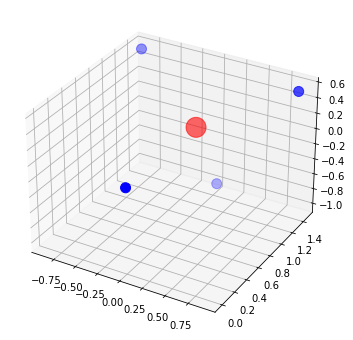

In [32]:
from scipy.spatial.transform import Rotation as R

rot = R.from_euler("xyz", (90, 90, 90), degrees=True)
rotated_mol = rot.apply(mol_coord)
print(f"Rotated coordinates: \n{rotated_mol}")

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(rotated_mol[:, 0], rotated_mol[:, 1], rotated_mol[:, 2], s = [400, 100, 100, 100, 100], c=["r", "b", "b", "b", "b"])
plt.show()